## TRANSFER INCEPTION MODEL

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
import lasagne
from lasagne.layers import InputLayer
from lasagne.layers import Conv2DLayer
from lasagne.layers import Pool2DLayer
from lasagne.layers import DenseLayer
from lasagne.layers import GlobalPoolLayer
from lasagne.layers import ConcatLayer
from lasagne.layers.normalization import batch_norm
from lasagne.nonlinearities import softmax

In [10]:
def bn_conv(input_layer, **kwargs):
    l = Conv2DLayer(input_layer, **kwargs)
    l = batch_norm(l, epsilon=0.001)
    return l


In [11]:
def inceptionA(input_layer, nfilt):
    # Corresponds to a modified version of figure 5 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=5, pad=2)

    l3 = bn_conv(input_layer, num_filters=nfilt[2][0], filter_size=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][1], filter_size=3, pad=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][2], filter_size=3, pad=1)

    l4 = Pool2DLayer(
        input_layer, pool_size=3, stride=1, pad=1, mode='average_exc_pad')
    l4 = bn_conv(l4, num_filters=nfilt[3][0], filter_size=1)

    return ConcatLayer([l1, l2, l3, l4])


In [12]:
def inceptionB(input_layer, nfilt):
    # Corresponds to a modified version of figure 10 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=3, stride=2)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=3, pad=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][2], filter_size=3, stride=2)

    l3 = Pool2DLayer(input_layer, pool_size=3, stride=2)

    return ConcatLayer([l1, l2, l3])


In [13]:
def inceptionC(input_layer, nfilt):
    # Corresponds to figure 6 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=(1, 7), pad=(0, 3))
    l2 = bn_conv(l2, num_filters=nfilt[1][2], filter_size=(7, 1), pad=(3, 0))

    l3 = bn_conv(input_layer, num_filters=nfilt[2][0], filter_size=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][1], filter_size=(7, 1), pad=(3, 0))
    l3 = bn_conv(l3, num_filters=nfilt[2][2], filter_size=(1, 7), pad=(0, 3))
    l3 = bn_conv(l3, num_filters=nfilt[2][3], filter_size=(7, 1), pad=(3, 0))
    l3 = bn_conv(l3, num_filters=nfilt[2][4], filter_size=(1, 7), pad=(0, 3))

    l4 = Pool2DLayer(
        input_layer, pool_size=3, stride=1, pad=1, mode='average_exc_pad')
    l4 = bn_conv(l4, num_filters=nfilt[3][0], filter_size=1)

    return ConcatLayer([l1, l2, l3, l4])


In [14]:
def inceptionD(input_layer, nfilt):
    # Corresponds to a modified version of figure 10 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)
    l1 = bn_conv(l1, num_filters=nfilt[0][1], filter_size=3, stride=2)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=(1, 7), pad=(0, 3))
    l2 = bn_conv(l2, num_filters=nfilt[1][2], filter_size=(7, 1), pad=(3, 0))
    l2 = bn_conv(l2, num_filters=nfilt[1][3], filter_size=3, stride=2)

    l3 = Pool2DLayer(input_layer, pool_size=3, stride=2)

    return ConcatLayer([l1, l2, l3])

In [15]:
def inceptionE(input_layer, nfilt, pool_mode):
    # Corresponds to figure 7 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2a = bn_conv(l2, num_filters=nfilt[1][1], filter_size=(1, 3), pad=(0, 1))
    l2b = bn_conv(l2, num_filters=nfilt[1][2], filter_size=(3, 1), pad=(1, 0))

    l3 = bn_conv(input_layer, num_filters=nfilt[2][0], filter_size=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][1], filter_size=3, pad=1)
    l3a = bn_conv(l3, num_filters=nfilt[2][2], filter_size=(1, 3), pad=(0, 1))
    l3b = bn_conv(l3, num_filters=nfilt[2][3], filter_size=(3, 1), pad=(1, 0))

    l4 = Pool2DLayer(
        input_layer, pool_size=3, stride=1, pad=1, mode=pool_mode)

    l4 = bn_conv(l4, num_filters=nfilt[3][0], filter_size=1)

    return ConcatLayer([l1, l2a, l2b, l3a, l3b, l4])


In [16]:

net = {}

net['input'] = InputLayer((None, 3, 299, 299))
net['conv'] = bn_conv(net['input'],
                      num_filters=32, filter_size=3, stride=2)
net['conv_1'] = bn_conv(net['conv'], num_filters=32, filter_size=3)
net['conv_2'] = bn_conv(net['conv_1'],
                        num_filters=64, filter_size=3, pad=1)
net['pool'] = Pool2DLayer(net['conv_2'], pool_size=3, stride=2, mode='max')

net['conv_3'] = bn_conv(net['pool'], num_filters=80, filter_size=1)

net['conv_4'] = bn_conv(net['conv_3'], num_filters=192, filter_size=3)

net['pool_1'] = Pool2DLayer(net['conv_4'],
                            pool_size=3, stride=2, mode='max')
net['mixed/join'] = inceptionA(
    net['pool_1'], nfilt=((64,), (48, 64), (64, 96, 96), (32,)))
net['mixed_1/join'] = inceptionA(
    net['mixed/join'], nfilt=((64,), (48, 64), (64, 96, 96), (64,)))

net['mixed_2/join'] = inceptionA(
    net['mixed_1/join'], nfilt=((64,), (48, 64), (64, 96, 96), (64,)))

net['mixed_3/join'] = inceptionB(
    net['mixed_2/join'], nfilt=((384,), (64, 96, 96)))

net['mixed_4/join'] = inceptionC(
    net['mixed_3/join'],
    nfilt=((192,), (128, 128, 192), (128, 128, 128, 128, 192), (192,)))

net['mixed_5/join'] = inceptionC(
    net['mixed_4/join'],
    nfilt=((192,), (160, 160, 192), (160, 160, 160, 160, 192), (192,)))

net['mixed_6/join'] = inceptionC(
    net['mixed_5/join'],
    nfilt=((192,), (160, 160, 192), (160, 160, 160, 160, 192), (192,)))

net['mixed_7/join'] = inceptionC(
    net['mixed_6/join'],
    nfilt=((192,), (192, 192, 192), (192, 192, 192, 192, 192), (192,)))

net['mixed_8/join'] = inceptionD(
    net['mixed_7/join'],
    nfilt=((192, 320), (192, 192, 192, 192)))

net['mixed_9/join'] = inceptionE(
    net['mixed_8/join'],
    nfilt=((320,), (384, 384, 384), (448, 384, 384, 384), (192,)),
    pool_mode='average_exc_pad')

net['mixed_10/join'] = inceptionE(
    net['mixed_9/join'],
    nfilt=((320,), (384, 384, 384), (448, 384, 384, 384), (192,)),
    pool_mode='max')

net['pool3'] = GlobalPoolLayer(net['mixed_10/join'])

net['softmax'] = DenseLayer(
    net['pool3'], num_units=1008, nonlinearity=softmax)

output_layer = net['softmax']


**_ Load the pretrained parameters of the model._**

In [18]:
import pickle

model = pickle.load(open('inception_v3.pkl'))
CLASSES = model['synset words']

lasagne.layers.set_all_param_values(output_layer, model['param values'])

**_ Preprocessing the images before inputing them into the network. _**

In [19]:
def preprocess(im):
    # Expected input: RGB uint8 image
    # Input to network should be bc01, 299x299 pixels, scaled to [-1, 1].
    import skimage.transform
    import numpy as np

    im = skimage.transform.resize(im, (299, 299), preserve_range=True)
    im = (im - 128) / 128.
    im = np.rollaxis(im, 2)[np.newaxis].astype('float32')

    return im

**_ Load the images._**

In [20]:
import io
import skimage.transform

def prep_image(url):
    ext = url.split('.')[-1]
    im = plt.imread(io.BytesIO(urllib.urlopen(url).read()), ext)
    return skimage.transform.resize(im, (224, 224), preserve_range=True), preprocess(im)

In [1]:
import scipy.io as scio
import pylab
Data = scio.loadmat('/Users/Bato/Dropbox/ipy_notebook/All_PC_DataforBato.mat')
I = Data['images']; Ans = Data['state'] # shape of I: (101, 101, 842)

In [21]:
pylab.rcParams['figure.figsize'] = (15,15)
pylab.rcParams['figure.subplot.hspace']=0.05
pylab.rcParams['figure.subplot.wspace']=0.05

def show_multiple(I):
    num_patches = 500
    for i in range(400,num_patches,3):
        pylab.subplot(np.ceil(np.sqrt(num_patches/3.0)),np.ceil(np.sqrt(num_patches/3.0)),i/3.0+1);
        plt.imshow(I[:,:,i],cmap='gray')
        pylab.axis('off')
        

**_Display the images._**

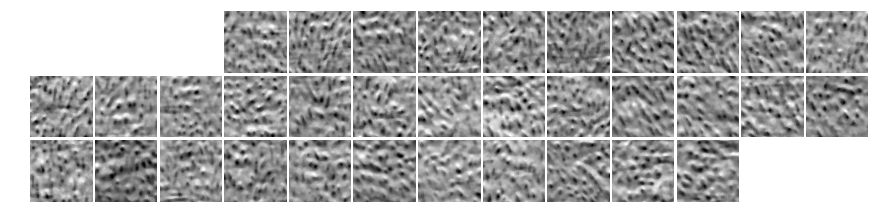

In [22]:
show_multiple(I)

## Figure out what each layer is doing. 

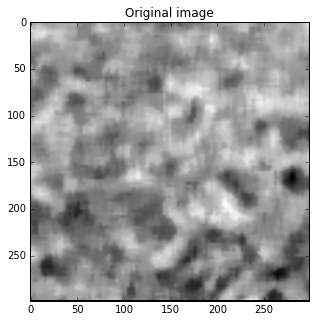

In [48]:
resize_image = skimage.transform.resize(I[:,:,0],(299, 299),preserve_range=True)
nor_image = (resize_image - np.mean(resize_image))/np.mean(resize_image)
nor_3d = np.dstack((np.dstack((nor_image,nor_image)),nor_image))
figure(figsize = (5,5))
plt.imshow(nor_3d[:,:,2],cmap='gray')
plt.title('Original image')

In [49]:
test_image = np.rollaxis(nor_3d,2)[np.newaxis].astype('float32')
first_layer = lasagne.layers.get_output(net['conv'], test_image, deterministic=True).eval() # shape (1,32,149,149)

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <type 'exceptions.TypeError'> ('The type of the replacement must be compatible with the type of the original Variable.', AbstractConv2d{border_mode='valid', subsample=(2, 2), filter_flip=True, imshp=(None, 3, 299, 299), kshp=(32, 3, 3, 3), filter_dilation=(1, 1)}.0, CorrMM{valid, (2, 2), (1, 1)}.0, TensorType(float32, (True, False, False, False)), TensorType(float64, (True, False, False, False)), 'LocalOptGroup(local_abstractconv_gemm,local_abstractconv_gradinputs_gemm,local_abstractconv_gradweight_gemm,local_conv2d_cpu,local_conv2d_gradinputs_cpu,local_conv2d_gradweight_cpu)') LocalOptGroup(local_abstractconv_gemm,local_abstractconv_gradinputs_gemm,local_abstractconv_gradweight_gemm,local_conv2d_cpu,local_conv2d_gradinputs_cpu,local_conv2d_gradweight_cpu)
ERROR (theano.gof.opt): Optimization failure due to: LocalOptGroup(local_abstractconv_gemm,local_abstractconv_gradinputs_gemm,local_abstractconv_gradweight_gemm,local_conv2d_cpu,local_con

AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?

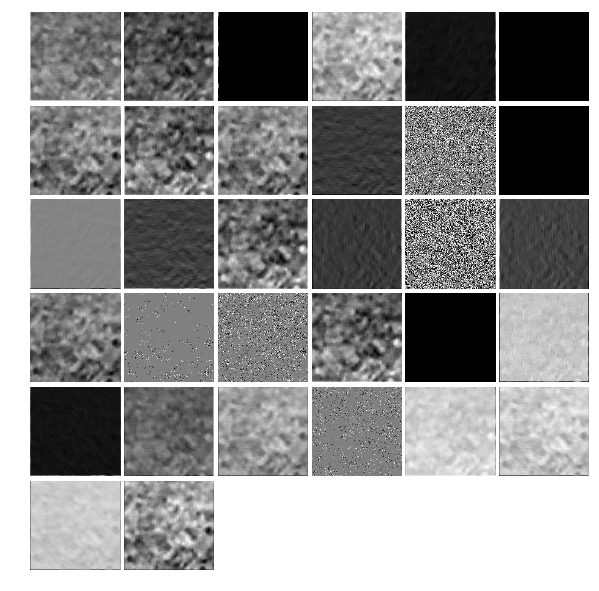

In [90]:
for i in range(0,first_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(32/1.0)),np.ceil(np.sqrt(32/1.0)),i/1.0+1);
    plt.imshow(first_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

In [95]:
second_layer = lasagne.layers.get_output(net['conv_1'], test_image, deterministic=True).eval() # shape (1,32,147,147)

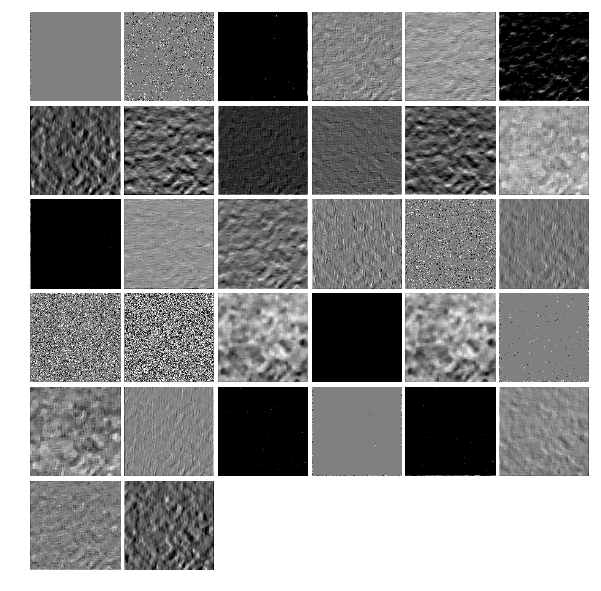

In [93]:
for i in range(0,second_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(32/1.0)),np.ceil(np.sqrt(32/1.0)),i/1.0+1);
    plt.imshow(second_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

In [96]:
third_layer = lasagne.layers.get_output(net['conv_2'], test_image, deterministic=True).eval() # shape (1,64,147,147)

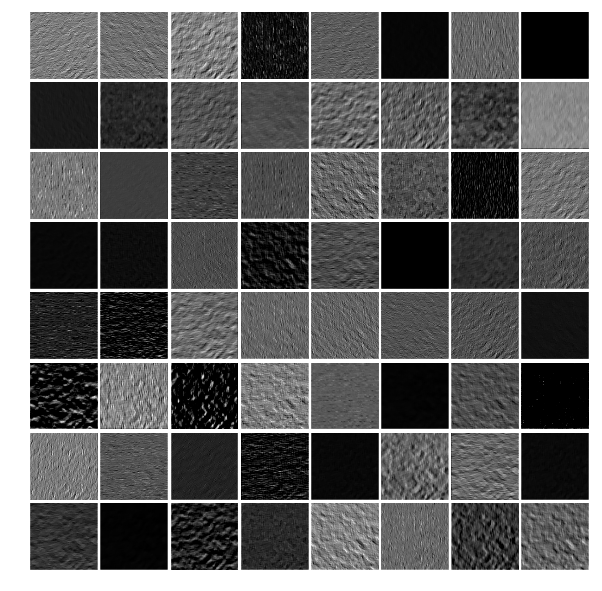

In [99]:
for i in range(0,third_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(64.0)),np.ceil(np.sqrt(64/1.0)),i/1.0+1);
    plt.imshow(third_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

In [102]:
fourth_layer = lasagne.layers.get_output(net['conv_3'], test_image, deterministic=True).eval() # shape (1,80,73,73)

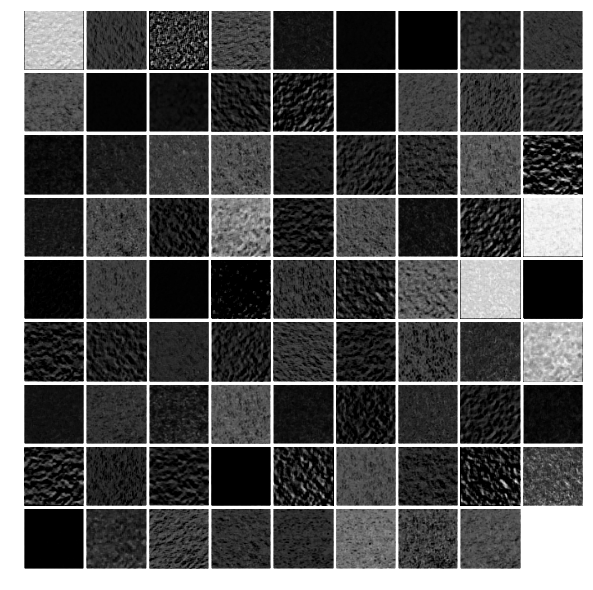

In [104]:
for i in range(0,fourth_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(80.0)),np.ceil(np.sqrt(80/1.0)),i/1.0+1);
    plt.imshow(fourth_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

In [105]:
fifth_layer = lasagne.layers.get_output(net['conv_4'], test_image, deterministic=True).eval() # shape (1,192,71,71)

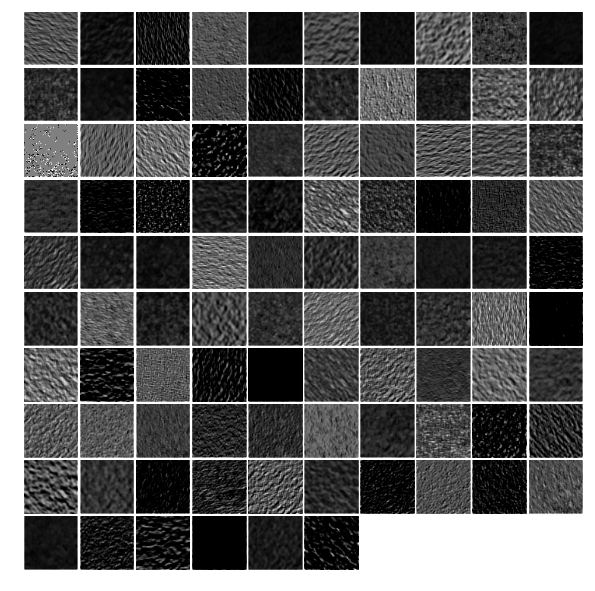

In [107]:
for i in range(0,fifth_layer.shape[1],2):
    pylab.subplot(np.ceil(np.sqrt(192.0/2)),np.ceil(np.sqrt(192/2.0)),i/2.0+1);
    plt.imshow(fifth_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

In [113]:
first_mix = lasagne.layers.get_output(net['mixed/join'], test_image, deterministic=True).eval() # shape (1,256,35,35)

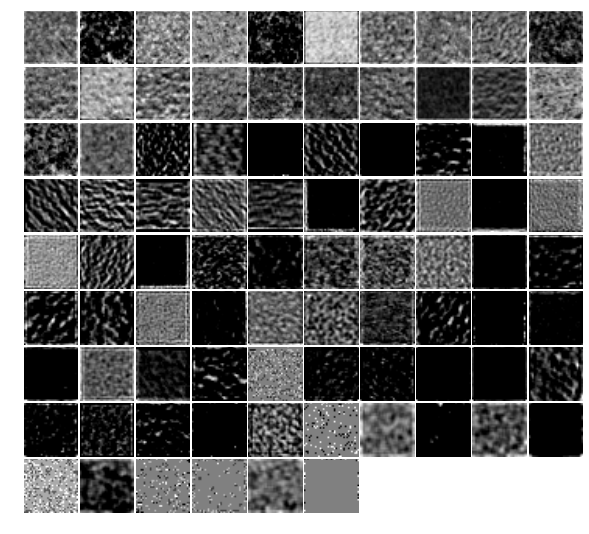

In [115]:
for i in range(0,first_mix.shape[1],3):
    pylab.subplot(np.ceil(np.sqrt(256/3)),np.ceil(np.sqrt(256/3.0)),i/3.0+1);
    plt.imshow(first_mix[0,i,:,:],cmap='gray')
    plt.axis('off')

In [124]:
fifth_mix = lasagne.layers.get_output(net['mixed_4/join'], test_image, deterministic=True).eval() # shape (1,256,35,35)

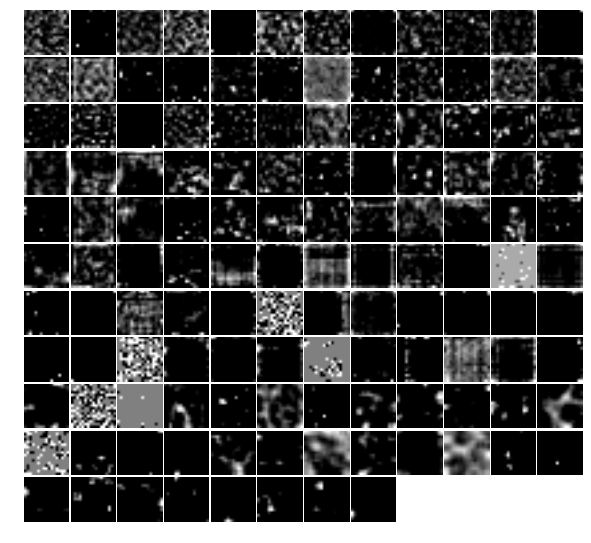

In [125]:
for i in range(0,fifth_mix.shape[1],6):
    pylab.subplot(np.ceil(np.sqrt(768/6.0)),np.ceil(np.sqrt(768/6.0)),i/6.0+1);
    plt.imshow(fifth_mix[0,i,:,:],cmap='gray')
    plt.axis('off')

In [37]:
ninth_mix = lasagne.layers.get_output(net['mixed_8/join'], test_image, deterministic=True).eval() # shape (1,1280,8,8)

NameError: name 'test_image' is not defined

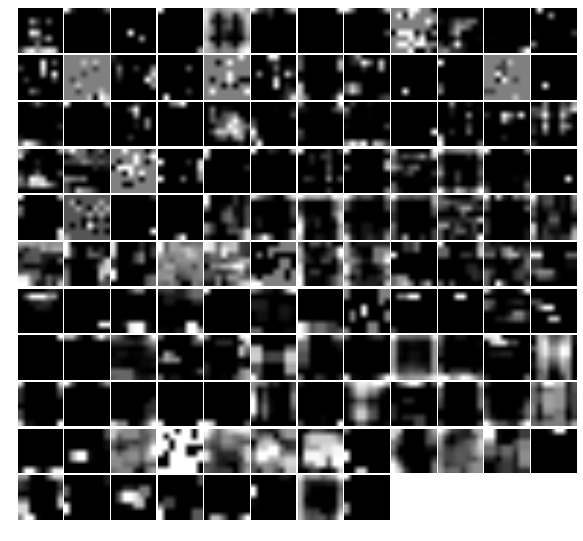

In [128]:
for i in range(0,ninth_mix.shape[1],10):
    pylab.subplot(np.ceil(np.sqrt(1280/10.0)),np.ceil(np.sqrt(1280/10.0)),i/10.0+1);
    plt.imshow(ninth_mix[0,i,:,:],cmap='gray')
    plt.axis('off')

**_Input the above image into the network._**

In [30]:
net['out'] = GlobalPoolLayer(net['mixed/join'])

In [33]:
lasagne.layers.get_output(net['softmax'])

Softmax.0

In [34]:
def read_med(images):
    
    feat_matrix = np.zeros((3,256))#((images.shape[2], 256))
    
    for i in range(0, images.shape[2]):
        
        after_resize = skimage.transform.resize(images[:,:,i], (299, 299), preserve_range=True)
        after_normalize = (after_resize - np.mean(after_resize))/np.mean(after_resize)
        convert_3d = np.dstack((np.dstack((after_normalize,after_normalize)),after_normalize))
        after_roll = np.rollaxis(convert_3d, 2)[np.newaxis].astype('float32')
        print i
        prob_med = np.array(lasagne.layers.get_output(net['softmax'], after_roll, deterministic=True).eval())
        feat_med = lasagne.layers.get_output(net['out'], after_roll, deterministic=True).eval()
        feat_matrix[i, :] = feat_med
        
    return feat_matrix
        
        

In [46]:
sys.path.insert(0,"/usr/local/Cellar/openblas")

In [ ]:
np.savetxt('features_med_reduce.csv',feat_matrix,delimiter=",")

**_RESULT_**

+ _Previous with Minkowski Functionals: 0.94 ± 0.08_
+ _CNN with rbf kernel: 0.94 ± 0.08_
+ _CNN weka-random forest: 0.97_
+ _CNN weka-rbfNN: 0.86_
+ _CNN weka-SVM: 0.74_